In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

N_atoms: 21
Delta: 1.0
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


(-10, 10)

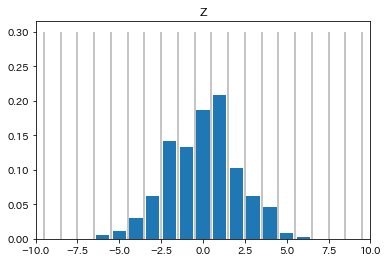

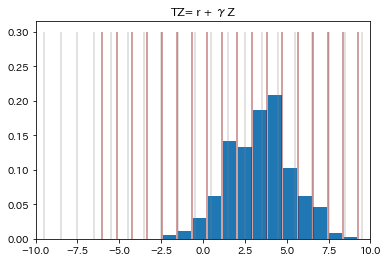

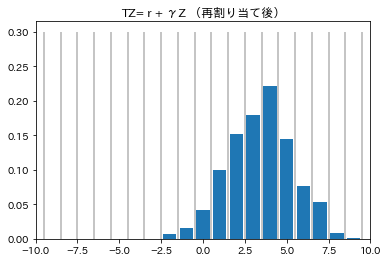

In [93]:
V_min = -10
V_max = 10
sample_data = np.random.normal(0, 2, 100)


"""準備：離散確率分布Zの作成
"""
n_atoms = 21
Z = np.linspace(V_min, V_max, n_atoms)
delta_z = (V_max - V_min) / (n_atoms - 1)
print("N_atoms:", n_atoms)
print(f"Delta:", delta_z)
print(Z)

dist = np.zeros(n_atoms)
for d in sample_data:
    idx = (d - V_min) / delta_z
    lower_idx, upper_idx = np.floor(idx).astype(np.int8), np.ceil(idx).astype(np.int8)
    #print(d, l, u)
    #print(1-(d-l), 1-(u-d))
    dist[lower_idx] += 1 - (idx - lower_idx)  
    dist[upper_idx] += 1- (upper_idx - idx)

plt.vlines(np.arange(-10, 11, 1)-0.5, ymin=0, ymax=0.3, color="gray", alpha=0.6)
plt.bar(Z, dist/dist.sum())
plt.title("Z")
plt.xlim(-10,10)

"""Zへのベルマンオペレータ適用とbinへの再割り当て
    Z(t) = TZ(t) = r + γZ(t+1)
"""
reward = 3.4
gamma = 0.9
done = False
TZ = reward + gamma * (1-done) * Z


plt.figure()
plt.vlines(np.arange(-10, 11, 1)-0.5, ymin=0, ymax=0.3, color="gray", alpha=0.3)
plt.vlines(reward + gamma * (np.arange(-10, 11, 1)-0.5), ymin=0, ymax=0.3, color="darkred", alpha=0.5)
plt.bar(TZ, dist/dist.sum())
plt.title("TZ= r + γZ")
plt.xlim(-10,10)

tdist = np.zeros(n_atoms)
for i in range(n_atoms):
    idx = (TZ[i] - V_min) / delta_z
    
    lower_idx, upper_idx = np.floor(idx).astype(np.int8), np.ceil(idx).astype(np.int8)
    
    lower_idx = np.clip(lower_idx, 0, n_atoms-1)
    upper_idx = np.clip(upper_idx, 0, n_atoms-1)
    
    lower_prob = (1 - (idx - lower_idx))
    upper_prob = 1 - lower_prob
    tdist[lower_idx] += lower_prob * dist[i]  
    tdist[upper_idx] += upper_prob * dist[i]

    #print(TZ[i], idx, dist[i])
    #print(idx, lower_idx, upper_idx)
    #print(lower_prob, upper_prob)
    #print(lower_prob + upper_prob)
    #print()
    
plt.figure()
plt.vlines(np.arange(-10, 11, 1)-0.5, ymin=0, ymax=0.3, color="gray", alpha=0.6)
plt.bar(Z, tdist/tdist.sum())
plt.title("TZ= r + γZ （再割り当て後）")
plt.xlim(-10,10)

実際はTZのはみだし対処、juston対処、バッチ対応などでさらに処理が煩雑になる